In [1]:
import os
os.getcwd()

'C:\\Users\\nitish'

In [2]:
os.chdir("D:/MSc_Komal/Sem1/R\Project/Airbnb Price Prediction/Machine-Learning/Linear Regression/archive (1)")

In [3]:
os.getcwd()

'D:\\MSc_Komal\\Sem1\\R\\Project\\Airbnb Price Prediction\\Machine-Learning\\Linear Regression\\archive (1)'

In [4]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('Housing.csv')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [8]:
df.isnull().mean()*100

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
df.bedrooms.unique()

array([4, 3, 5, 2, 6, 1], dtype=int64)

In [11]:
df.bathrooms.unique()

array([2, 4, 1, 3], dtype=int64)

In [12]:
df.stories.unique()

array([3, 4, 2, 1], dtype=int64)

In [13]:
df.mainroad.unique()

array(['yes', 'no'], dtype=object)

In [14]:
df.guestroom.unique()

array(['no', 'yes'], dtype=object)

In [15]:
df.basement.unique()

array(['no', 'yes'], dtype=object)

In [16]:
df.hotwaterheating.unique()

array(['no', 'yes'], dtype=object)

In [17]:
df.airconditioning.unique()

array(['yes', 'no'], dtype=object)

In [18]:
df.parking.unique()

array([2, 3, 0, 1], dtype=int64)

In [19]:
df.prefarea.unique()

array(['yes', 'no'], dtype=object)

In [20]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [21]:
df_req=pd.get_dummies(df,drop_first=True)
df_req

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [22]:
from scipy.stats import zscore
df_req['Zscore']=zscore(df_req.price)
df_req[(df_req.Zscore>3.0) | (df_req.Zscore < -3.0)]



,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,Zscore
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0,4.566365
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0,4.004484
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0,4.004484
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0,3.985755
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0,3.554979
5,10850000,7500,3,3,1,2,1,0,1,0,1,1,1,0,3.255309


{'whiskers': [<matplotlib.lines.Line2D at 0x28317eb41c0>,
 'caps': [<matplotlib.lines.Line2D at 0x28317eb4820>,
 'boxes': [<matplotlib.lines.Line2D at 0x28317e98d00>],
 'medians': [<matplotlib.lines.Line2D at 0x28317eb4f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x28317ebf310>],
 'means': []}

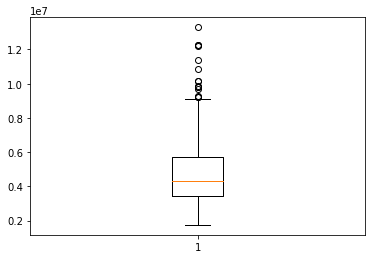

In [23]:
plt.boxplot(df_req['price'])

In [24]:
df_new=df_req[df_req['Zscore'].between(-3.0, 3.0, inclusive=False)]
df_new


C:\Users\nitish\AppData\Local\Temp/ipykernel_16288/3097464602.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df_new=df_req[df_req['Zscore'].between(-3.0, 3.0, inclusive=False)]


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,Zscore
6,10150000,8580,4,3,4,2,1,0,0,0,1,1,1,0,2.880722
7,10150000,16200,5,3,2,0,1,0,0,0,0,0,0,1,2.880722
8,9870000,8100,4,1,2,2,1,1,1,0,1,1,0,0,2.730887
9,9800000,5750,3,2,4,1,1,1,0,0,1,1,0,1,2.693428
10,9800000,13200,3,1,2,2,1,0,1,0,1,1,0,0,2.693428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1,-1.576868
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0,-1.605149
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1,-1.614327
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0,-1.614327


In [25]:
df_new['Zscore_Area']=zscore(df_new.area)
df_new=df_new[df_new['Zscore_Area'].between(-3.0, 3.0, inclusive=False)]
df_new

C:\Users\nitish\AppData\Local\Temp/ipykernel_16288/1401922485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Zscore_Area']=zscore(df_new.area)
C:\Users\nitish\AppData\Local\Temp/ipykernel_16288/1401922485.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df_new=df_new[df_new['Zscore_Area'].between(-3.0, 3.0, inclusive=False)]


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,Zscore,Zscore_Area
6,10150000,8580,4,3,4,2,1,0,0,0,1,1,1,0,2.880722,1.607004
8,9870000,8100,4,1,2,2,1,1,1,0,1,1,0,0,2.730887,1.384234
9,9800000,5750,3,2,4,1,1,1,0,0,1,1,0,1,2.693428,0.293587
11,9681000,6000,4,3,2,2,1,1,1,1,0,0,1,0,2.629748,0.409613
12,9310000,6550,4,2,2,1,1,0,0,0,1,1,1,0,2.431217,0.664871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1,-1.576868,-0.982701
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0,-1.605149,-1.261164
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1,-1.614327,-0.694956
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0,-1.614327,-1.024470


In [26]:
df_new['Zscore_bedrooms']=zscore(df_new.bedrooms)
df_new=df_new[df_new['Zscore_bedrooms'].between(-3.0, 3.0, inclusive=False)]
df_new

C:\Users\nitish\AppData\Local\Temp/ipykernel_16288/210369771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Zscore_bedrooms']=zscore(df_new.bedrooms)
C:\Users\nitish\AppData\Local\Temp/ipykernel_16288/210369771.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df_new=df_new[df_new['Zscore_bedrooms'].between(-3.0, 3.0, inclusive=False)]


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,Zscore,Zscore_Area,Zscore_bedrooms
6,10150000,8580,4,3,4,2,1,0,0,0,1,1,1,0,2.880722,1.607004,1.428398
8,9870000,8100,4,1,2,2,1,1,1,0,1,1,0,0,2.730887,1.384234,1.428398
9,9800000,5750,3,2,4,1,1,1,0,0,1,1,0,1,2.693428,0.293587,0.064111
11,9681000,6000,4,3,2,2,1,1,1,1,0,0,1,0,2.629748,0.409613,1.428398
12,9310000,6550,4,2,2,1,1,0,0,0,1,1,1,0,2.431217,0.664871,1.428398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1,-1.576868,-0.982701,-1.300175
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0,-1.605149,-1.261164,0.064111
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1,-1.614327,-0.694956,-1.300175
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0,-1.614327,-1.024470,0.064111


In [27]:
df_new['Zscore_bathrooms']=zscore(df_new.bathrooms)
df_new=df_new[df_new['Zscore_bathrooms'].between(-3.0, 3.0, inclusive=False)]
df_new

C:\Users\nitish\AppData\Local\Temp/ipykernel_16288/1461601610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Zscore_bathrooms']=zscore(df_new.bathrooms)
C:\Users\nitish\AppData\Local\Temp/ipykernel_16288/1461601610.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df_new=df_new[df_new['Zscore_bathrooms'].between(-3.0, 3.0, inclusive=False)]


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,Zscore,Zscore_Area,Zscore_bedrooms,Zscore_bathrooms
8,9870000,8100,4,1,2,2,1,1,1,0,1,1,0,0,2.730887,1.384234,1.428398,-0.568926
9,9800000,5750,3,2,4,1,1,1,0,0,1,1,0,1,2.693428,0.293587,0.064111,1.525037
12,9310000,6550,4,2,2,1,1,0,0,0,1,1,1,0,2.431217,0.664871,1.428398,1.525037
13,9240000,3500,4,2,2,2,1,0,0,1,0,0,0,0,2.393758,-0.750649,1.428398,1.525037
14,9240000,7800,3,2,2,0,1,0,0,0,0,1,1,0,2.393758,1.245002,0.064111,1.525037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1,-1.576868,-0.982701,-1.300175,-0.568926
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0,-1.605149,-1.261164,0.064111,-0.568926
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1,-1.614327,-0.694956,-1.300175,-0.568926
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0,-1.614327,-1.024470,0.064111,-0.568926


In [28]:
df_new['Zscore_parking']=zscore(df_new.parking)
df_new=df_new[df_new['Zscore_parking'].between(-3.0, 3.0, inclusive=False)]
df_new

C:\Users\nitish\AppData\Local\Temp/ipykernel_16288/3521426512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Zscore_parking']=zscore(df_new.parking)
C:\Users\nitish\AppData\Local\Temp/ipykernel_16288/3521426512.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df_new=df_new[df_new['Zscore_parking'].between(-3.0, 3.0, inclusive=False)]


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,Zscore,Zscore_Area,Zscore_bedrooms,Zscore_bathrooms,Zscore_parking
8,9870000,8100,4,1,2,2,1,1,1,0,1,1,0,0,2.730887,1.384234,1.428398,-0.568926,1.592718
9,9800000,5750,3,2,4,1,1,1,0,0,1,1,0,1,2.693428,0.293587,0.064111,1.525037,0.403306
12,9310000,6550,4,2,2,1,1,0,0,0,1,1,1,0,2.431217,0.664871,1.428398,1.525037,0.403306
13,9240000,3500,4,2,2,2,1,0,0,1,0,0,0,0,2.393758,-0.750649,1.428398,1.525037,1.592718
14,9240000,7800,3,2,2,0,1,0,0,0,0,1,1,0,2.393758,1.245002,0.064111,1.525037,-0.786105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1,-1.576868,-0.982701,-1.300175,-0.568926,1.592718
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0,-1.605149,-1.261164,0.064111,-0.568926,-0.786105
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1,-1.614327,-0.694956,-1.300175,-0.568926,-0.786105
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0,-1.614327,-1.024470,0.064111,-0.568926,-0.786105


{'whiskers': [<matplotlib.lines.Line2D at 0x28317cb1490>,
 'caps': [<matplotlib.lines.Line2D at 0x28317cb1bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28317cb1100>],
 'medians': [<matplotlib.lines.Line2D at 0x283186531f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28318653580>],
 'means': []}

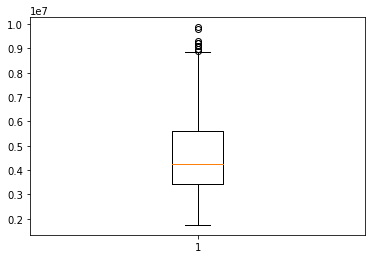

In [29]:
plt.boxplot(df_new['price'])

In [30]:
df_new=df_new.drop(['Zscore','Zscore_Area','Zscore_bedrooms','Zscore_bathrooms','Zscore_parking'],axis=1)

<AxesSubplot:>

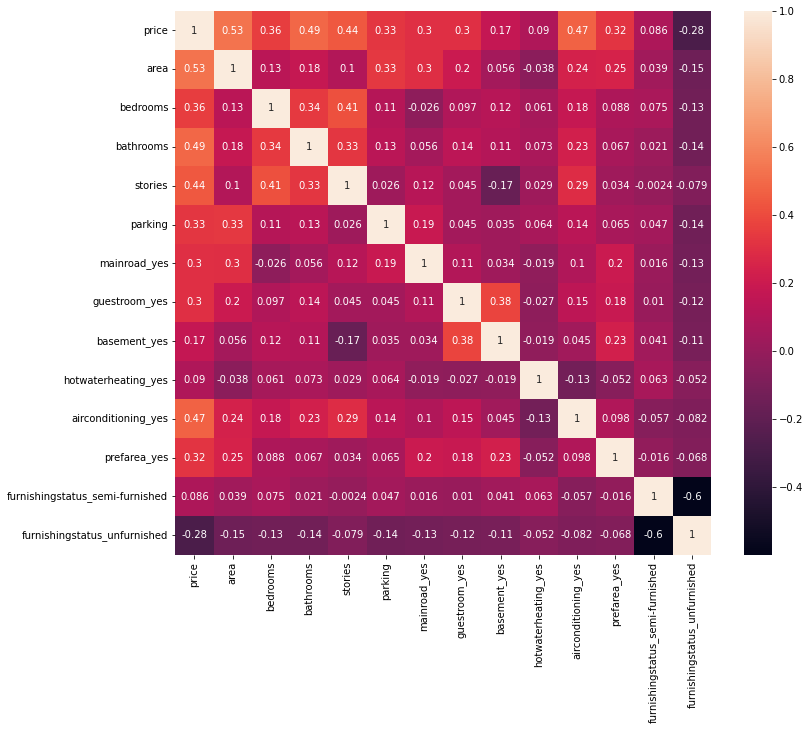

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(df_new.corr(),annot=True)

In [32]:
from scipy import stats
corr_df=pd.DataFrame(columns=['r','p'])

for col in df_new:
    r,p=stats.pearsonr(df_new.price,df_new[col])
    corr_df.loc[col]=[round(r,5),round(p,5)]
    
corr_df

,r,p
price,1.00000,0.00000
area,0.52635,0.00000
bedrooms,0.35537,0.00000
bathrooms,0.49168,0.00000
stories,0.44047,0.00000
parking,0.32625,0.00000
mainroad_yes,0.30462,0.00000
guestroom_yes,0.30104,0.00000
basement_yes,0.17446,0.00006
hotwaterheating_yes,0.08985,0.04017


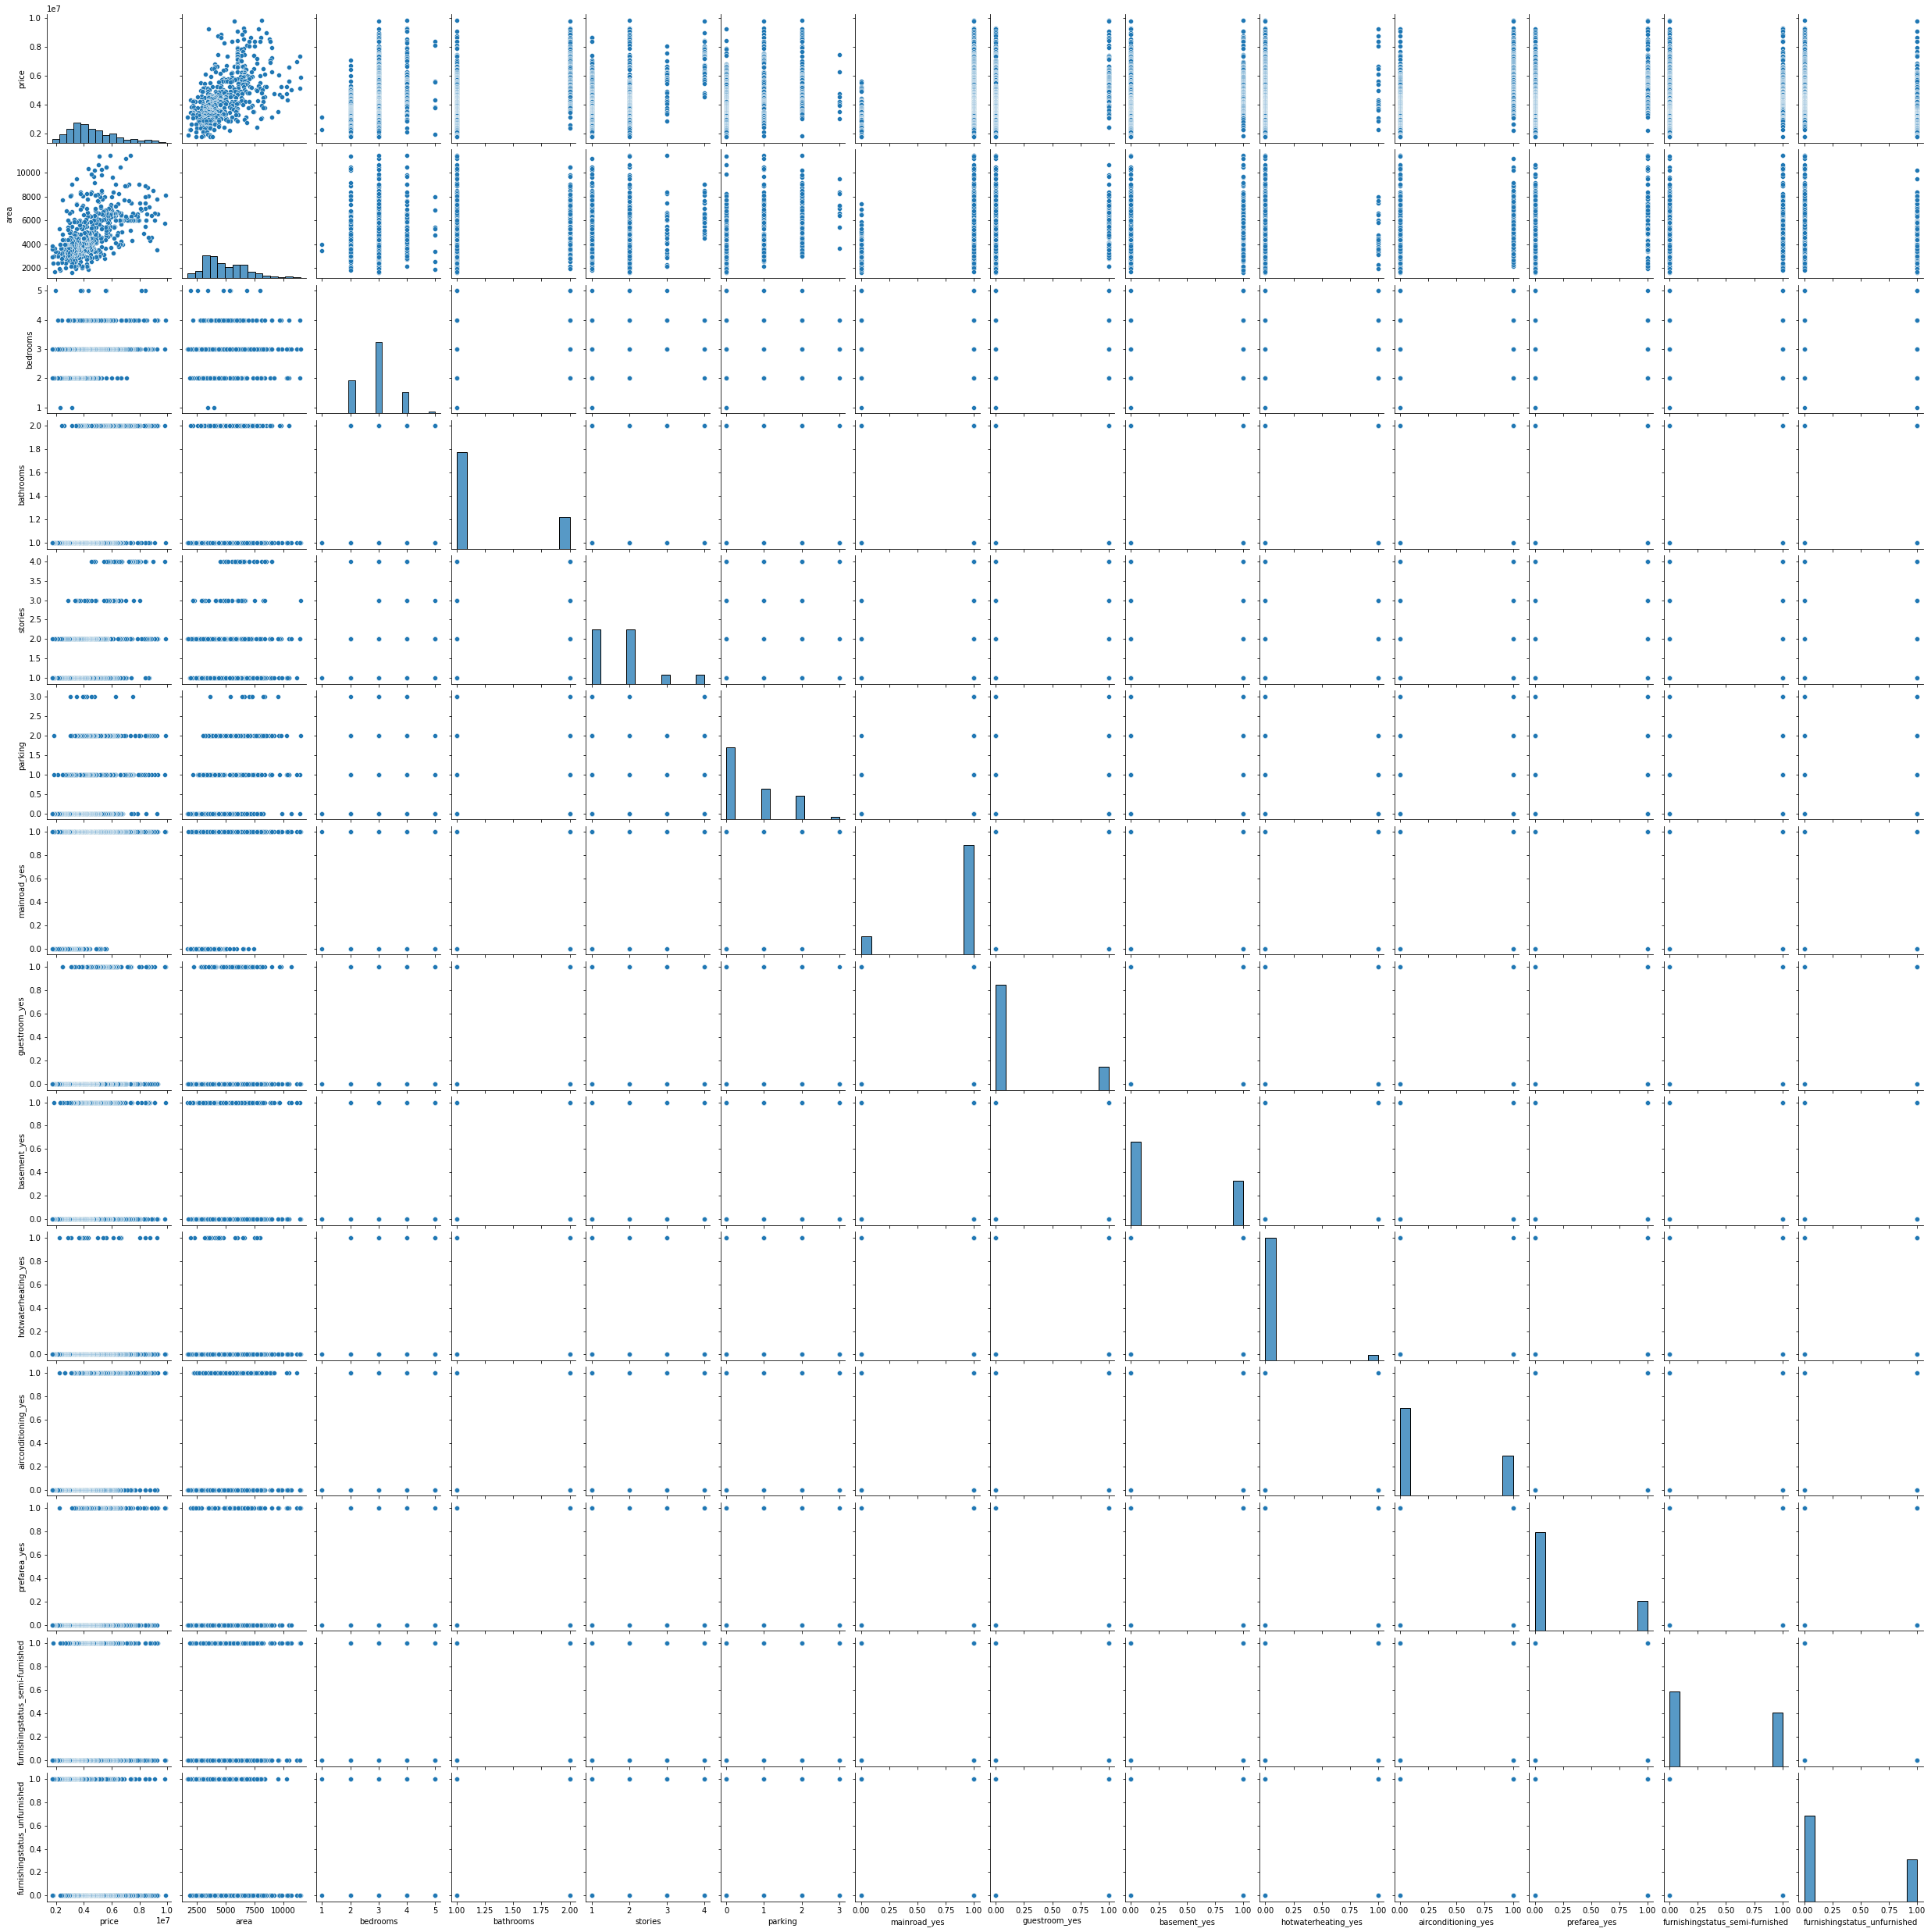

In [33]:
sns.pairplot(df_new)

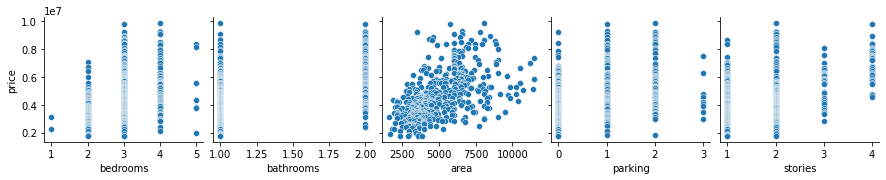

In [34]:
sns.pairplot(
    df_new,
    x_vars=["bedrooms", "bathrooms", "area","parking","stories"],
    y_vars=["price"],
)

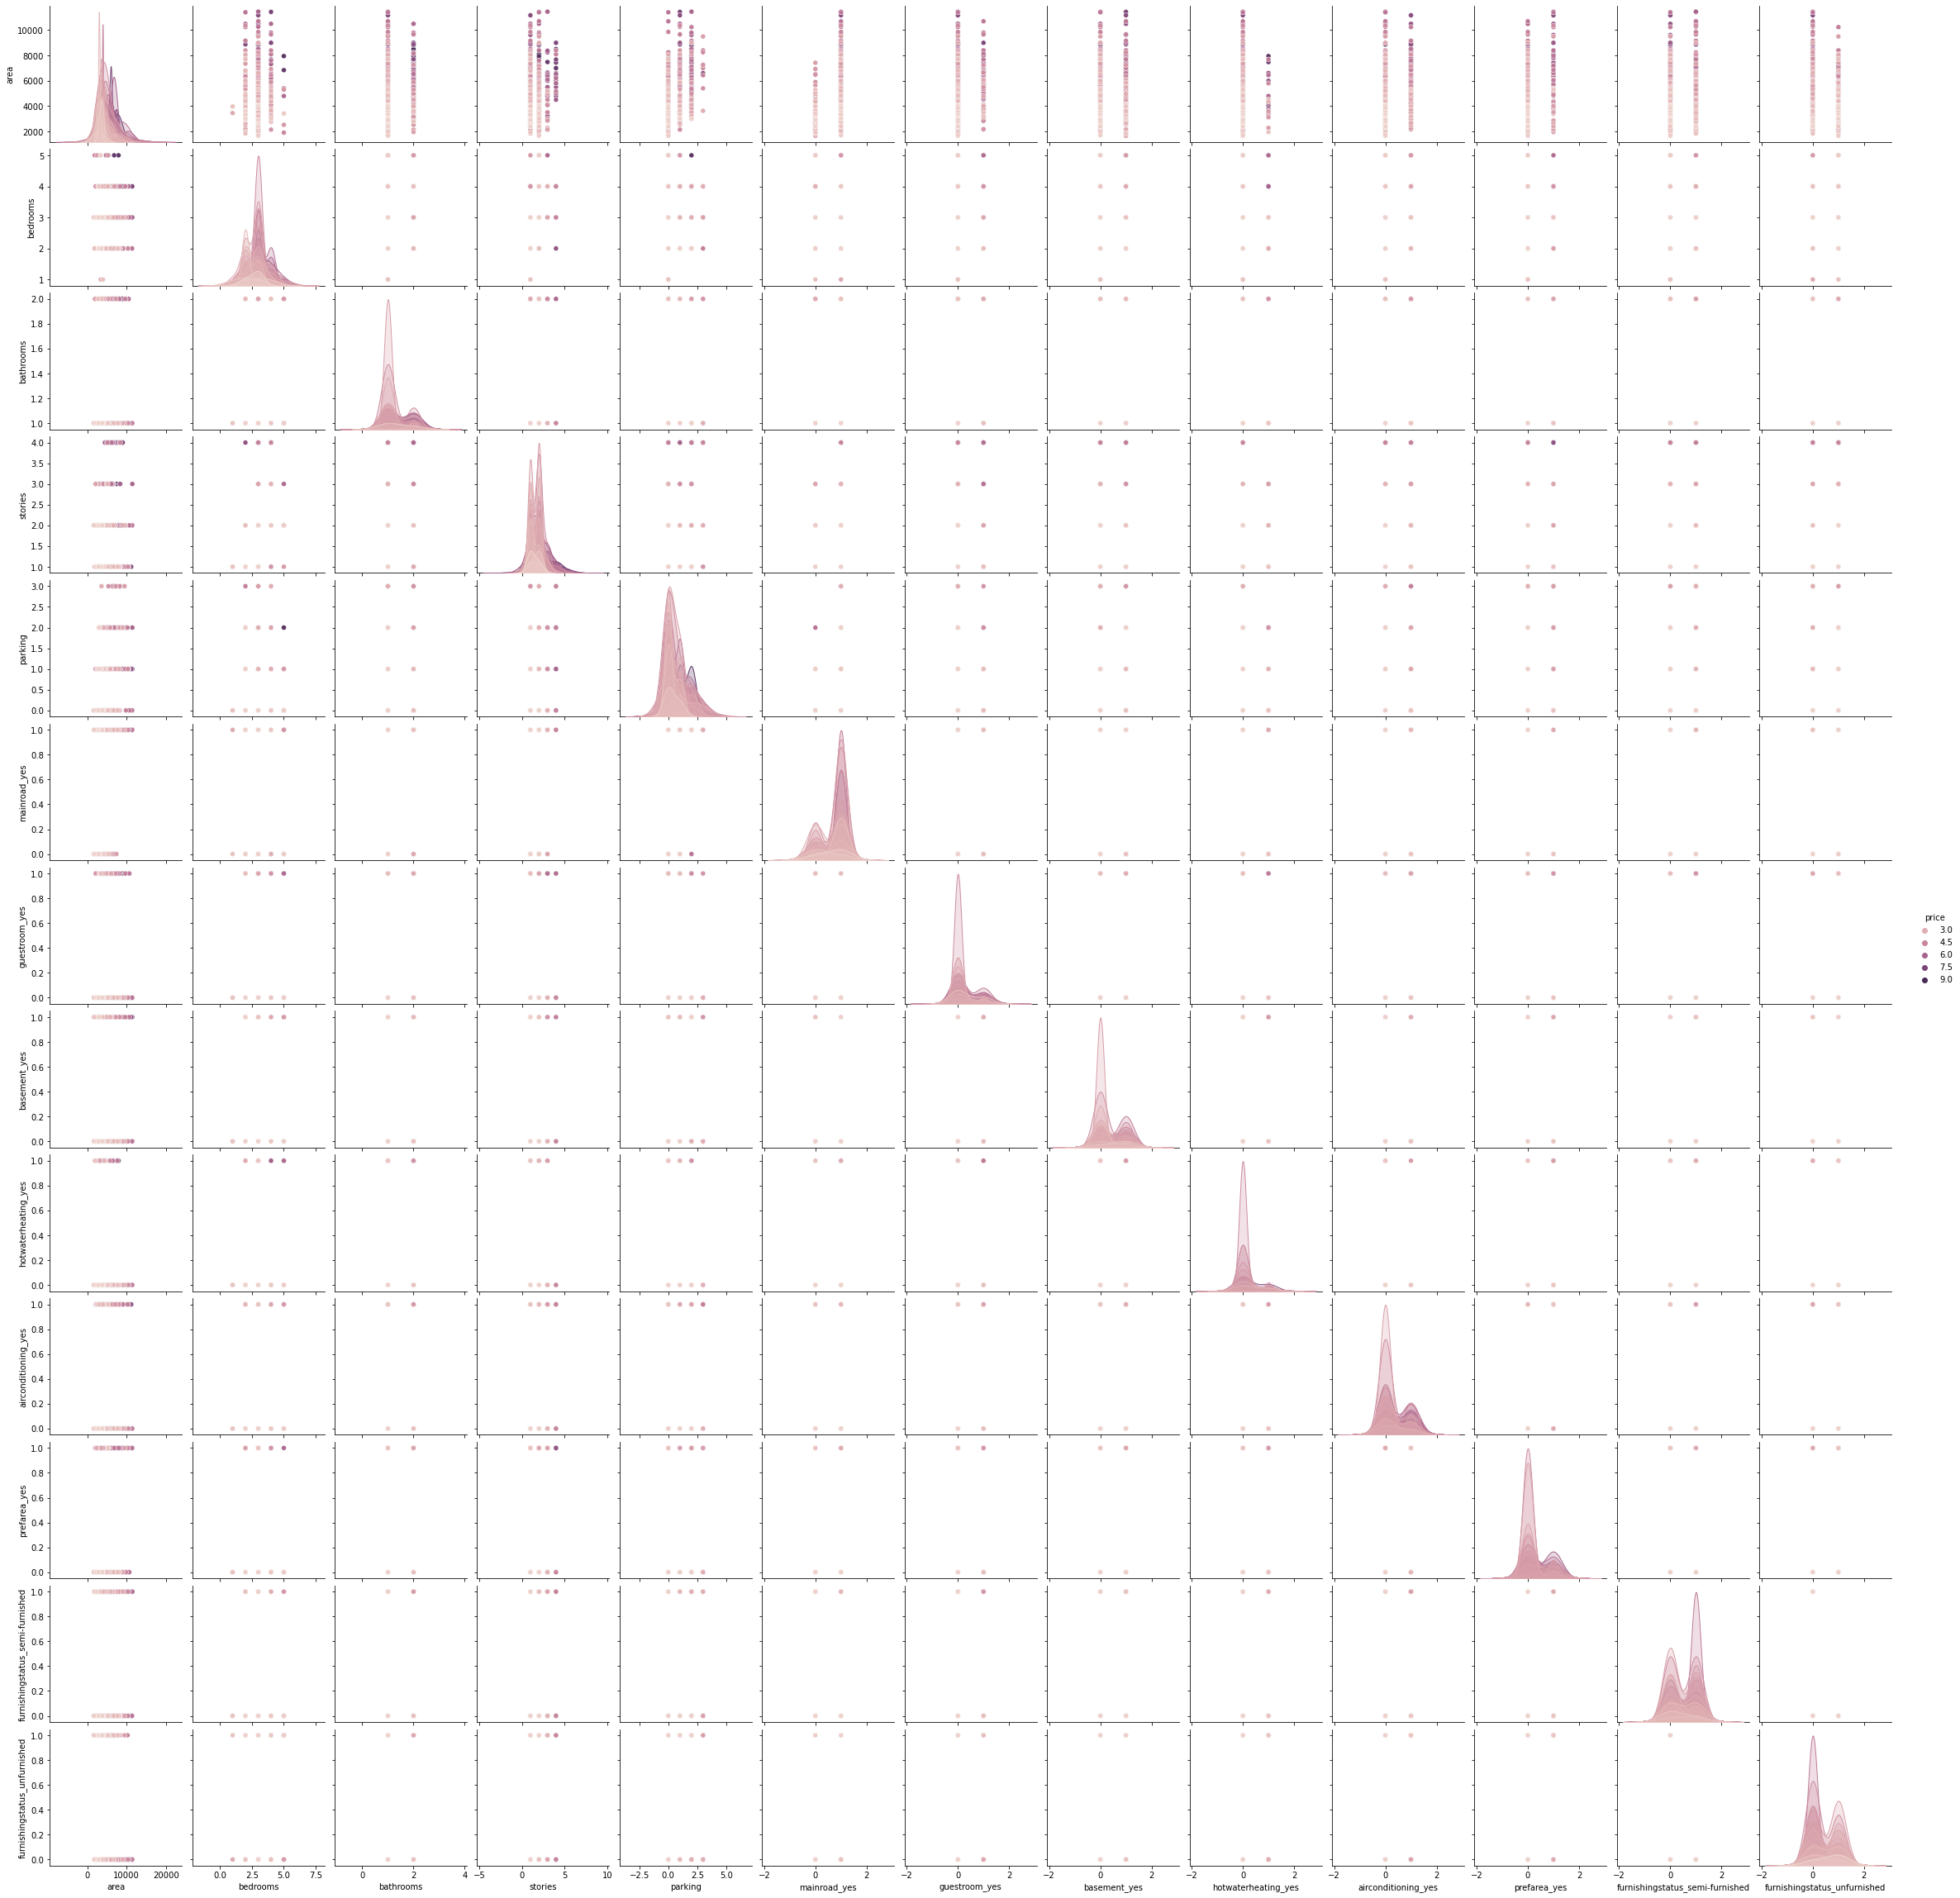

In [35]:
sns.pairplot(df_new, hue="price")

In [36]:
df_new.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
8,9870000,8100,4,1,2,2,1,1,1,0,1,1,0,0
9,9800000,5750,3,2,4,1,1,1,0,0,1,1,0,1
12,9310000,6550,4,2,2,1,1,0,0,0,1,1,1,0
13,9240000,3500,4,2,2,2,1,0,0,1,0,0,0,0
14,9240000,7800,3,2,2,0,1,0,0,0,0,1,1,0


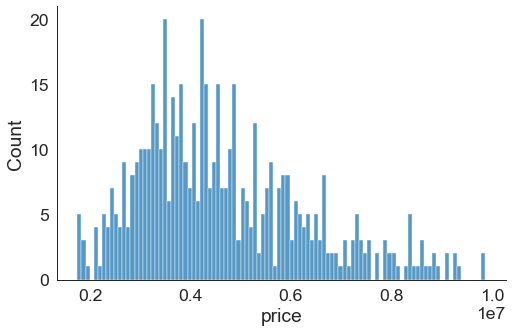

In [37]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df_new, x="price", kind="hist", bins = 100, aspect = 1.5)

In [38]:
X=pd.DataFrame(df_new.drop(['price'],axis=1))
y=pd.DataFrame(df_new['price'])

In [39]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

In [40]:
clf=LinearRegression()

In [41]:
clf.fit(X_train,y_train)

LinearRegression()

In [42]:
clf.predict(X_test)

array([[6019619.5095483 ],
       [3223366.51244683],
       [3041737.78395901],
       [2825695.43635249],
       [3293825.29372639],
       [3277111.64433602],
       [5287465.20239864],
       [4316733.23791219],
       [4565158.99558354],
       [3740195.99387198],
       [5824058.20558408],
       [4632996.48222688],
       [3303044.97003646],
       [2676560.29338311],
       [3032448.9852194 ],
       [7905593.48405539],
       [4426826.87500329],
       [3566444.96529781],
       [3674085.95886749],
       [4537614.19472804],
       [2684577.09642539],
       [6098469.00576988],
       [6023314.49663513],
       [8067809.97529657],
       [4871944.88585224],
       [5715782.55704793],
       [3348982.55493155],
       [4348300.12422286],
       [4037139.00333289],
       [6619748.73018384],
       [7049980.17980512],
       [3131408.28255089],
       [4211980.3184677 ],
       [5551296.68417769],
       [5373005.96696478],
       [7255002.60754422],
       [4599777.74536845],
 

In [43]:
y_test

,price
62,7070000
534,2100000
417,3395000
430,3290000
463,3080000
...,...
158,5495000
361,3710000
96,6300000
28,8400000


In [44]:
clf.score(X_test,y_test)

0.6296772852741389

pip install fitter

In [45]:
df_new.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
8,9870000,8100,4,1,2,2,1,1,1,0,1,1,0,0
9,9800000,5750,3,2,4,1,1,1,0,0,1,1,0,1
12,9310000,6550,4,2,2,1,1,0,0,0,1,1,1,0
13,9240000,3500,4,2,2,2,1,0,0,1,0,0,0,0
14,9240000,7800,3,2,2,0,1,0,0,0,0,1,1,0


In [76]:
df2=df_new[['price','area','bedrooms','bathrooms','stories','mainroad_yes','furnishingstatus_semi-furnished','airconditioning_yes','parking','guestroom_yes','prefarea_yes','hotwaterheating_yes']]

In [77]:
X=pd.DataFrame(df2.drop(['price'],axis=1))
y=pd.DataFrame(df2['price'])

In [78]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

In [79]:
clf=LinearRegression()

In [80]:
clf.fit(X_train,y_train)

LinearRegression()

In [81]:
clf.score(X_test,y_test)

0.6382177508680078

In [86]:
clf.score(X_train,y_train)

0.6568133609946476

In [85]:
df_new.dropna(inplace=True)
df_new

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
8,9870000,8100,4,1,2,2,1,1,1,0,1,1,0,0
9,9800000,5750,3,2,4,1,1,1,0,0,1,1,0,1
12,9310000,6550,4,2,2,1,1,0,0,0,1,1,1,0
13,9240000,3500,4,2,2,2,1,0,0,1,0,0,0,0
14,9240000,7800,3,2,2,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [96]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=18,max_iter=100,tol=0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=18, max_iter=100, tol=0.1)

In [97]:
lasso_reg.score(X_test,y_test)

0.6381938584874066

In [98]:
lasso_reg.score(X_train,y_train)

0.6568133539014338

In [110]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=30,max_iter=100,tol=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=30, max_iter=100, tol=0.1)

In [111]:
ridge_reg.score(X_test,y_test)

0.6009079512118771

In [112]:
ridge_reg.score(X_train,y_train)

0.64304851682257

In [113]:
os.getcwd()

'D:\\MSc_Komal\\Sem1\\R\\Project\\Airbnb Price Prediction\\Machine-Learning\\Linear Regression\\archive (1)'